## Prediksi Diabetes Menggunakan Algoritma Neural Network
Nama : Felicia Amanda Cahyadewi

NIM : A11.2022.14090

Kelompok A11.4701

## Deskripsi Singkat (Business Understanding dan Data Understanding)
Pada sistem prediksi diabetes ini menggunakan data pasien, yang mencakup faktor seperti usia,
jenis kelamin, hipertensi, penyakit jantung, riwayat merokok, BMI, tingkat HbA1c, dan kadar
glukosa darah. Data ini diolah agar model dapat memprediksi risiko diabetes dengan akurat,
sehingga dapat membantu tenaga medis dalam identifikasi dini pasien yang berisiko tinggi.

## Masalah dan Tujuan yang Akan Diselesaikan
Masalah: Diabetes merupakan penyakit kronis yang perlu dideteksi secara dini untuk
mengurangi komplikasi. Namun, proses identifikasi diabetes secara manual membutuhkan
waktu dan sumber daya yang besar.

Tujuan: Mengembangkan sistem prediksi otomatis untuk diabetes dengan menggunakan
algoritma neural network (MLPClassifier) yang dapat membantu dalam menganalisis data
pasien dengan cepat dan akurat. Dengan sistem ini, diharapkan dapat memberikan indikasi
awal tentang kemungkinan diabetes berdasarkan fitur-fitur medis yang ada.

In [64]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier


In [24]:
# Memuat dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

## Penjelasan Dataset

Kolom:

1. gender: Jenis kelamin (Male/Female).
2. age: Usia dalam tahun.
3. hypertension: Indikator apakah individu memiliki hipertensi (0: Tidak, 1: Ya).
4. heart_disease: Indikator apakah individu memiliki penyakit jantung (0: Tidak, 1: Ya).
5. smoking_history: Riwayat merokok (never, former, current, dll.).
6. bmi: Indeks massa tubuh.
7. HbA1c_level: Rata-rata kadar hemoglobin terglikasi.
8. blood_glucose_level: Tingkat glukosa darah.
9. diabetes: Label target, apakah individu menderita diabetes (0: Tidak, 1: Ya).


Kondisi Data:
1. Tidak ada nilai yang hilang pada dataset ini.
2. Terdapat variabel kategori (gender, smoking_history) dan numerik (age, bmi, dll.).

In [25]:
# Melihat beberapa baris pertama dari dataset
data.head(5).T

,0,1,2,3,4
gender,Female,Female,Male,Female,Male
age,80.0,54.0,28.0,36.0,76.0
hypertension,0,0,0,0,1
heart_disease,1,0,0,0,1
smoking_history,never,No Info,never,current,current
bmi,25.19,27.32,27.32,23.45,20.14
HbA1c_level,6.6,6.6,5.7,5.0,4.8
blood_glucose_level,140,80,158,155,155
diabetes,0,0,0,0,0


In [26]:
# Menampilkan bentuk (shape) dari dataset
data.shape

(100000, 9)

In [27]:
# Melihat info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [28]:
# Menghitung jumlah data yang duplikat
data.duplicated().sum()

np.int64(3854)

In [29]:
# Menghapus data duplikat dan mereset indek
# Create by IBNU RICHO
data = data.drop_duplicates(keep="last").reset_index()

In [30]:
# Jumlah duplikat setelah dihapus
data.duplicated().sum()

np.int64(0)

In [31]:
# Menampilkan bentuk (shape) dari dataset setelah penghapusan duplikat
data.shape

(96146, 10)

In [32]:
# Menampilkan nama kolom
data.columns

Index(['index', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

In [33]:
# Menghapus kolom 'index' yang tidak diperlukan
data = data.drop(['index'],axis = 1)

In [34]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [35]:
# Melihat beberapa baris pertama setelah pra-pemrosesan
data.head(5).T

,0,1,2,3,4
gender,Female,Male,Female,Male,Female
age,80.0,28.0,36.0,76.0,20.0
hypertension,0,0,0,1,0
heart_disease,1,0,0,1,0
smoking_history,never,never,current,current,never
bmi,25.19,27.32,23.45,20.14,27.32
HbA1c_level,6.6,5.7,5.0,4.8,6.6
blood_glucose_level,140,158,155,155,85
diabetes,0,0,0,0,0


In [52]:
#deskripsi numerik
numeric_description = data.describe()

In [54]:
#distribusi variabel target
diabetes_distribution = data['diabetes'].value_counts(normalize=True)

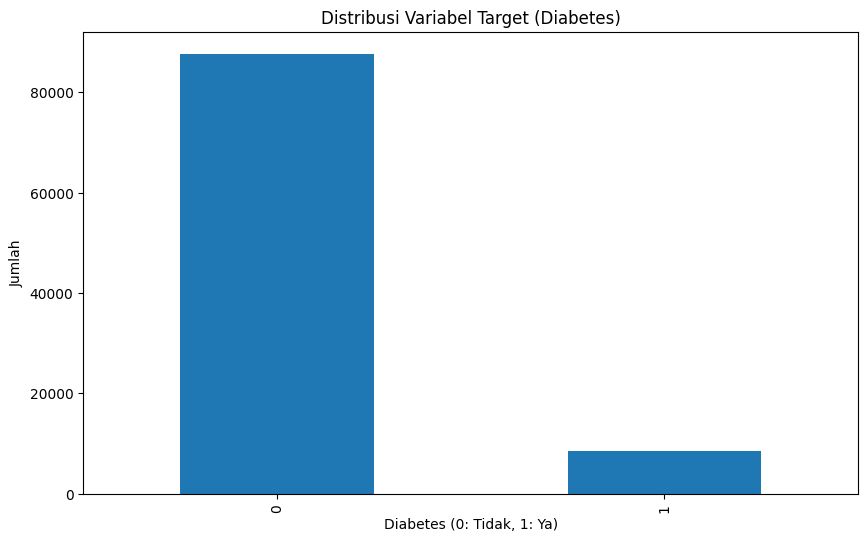

In [53]:
#visualisasi distribusi variabel target
plt.figure(figsize=(10, 6))
data['diabetes'].value_counts().plot(kind='bar')
plt.title('Distribusi Variabel Target (Diabetes)')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()

In [56]:
#fitur numerik visualisasi korelasi
correlation_matrix = data.corr()

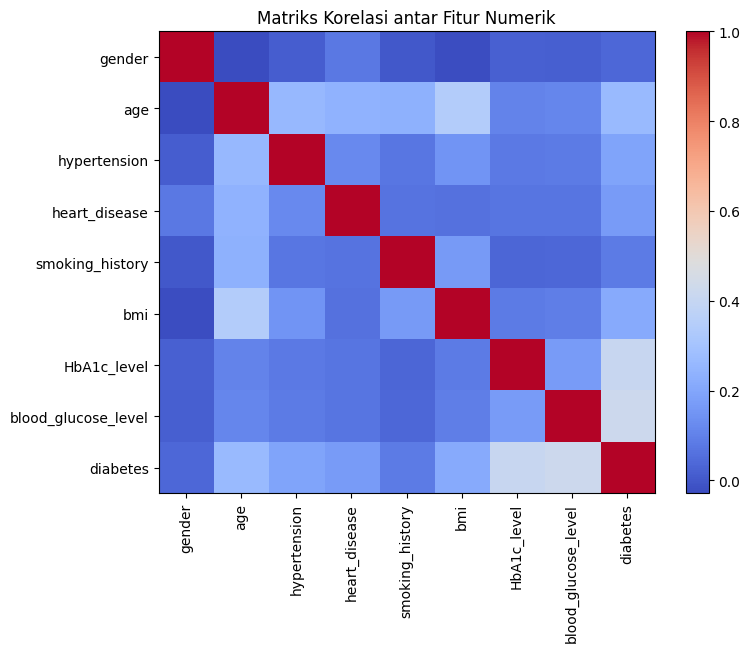

(             gender           age  hypertension  heart_disease  \
 count  96146.000000  96146.000000  96146.000000   96146.000000   
 mean       0.416065     41.794326      0.077601       0.040803   
 std        0.493287     22.462948      0.267544       0.197833   
 min        0.000000      0.080000      0.000000       0.000000   
 25%        0.000000     24.000000      0.000000       0.000000   
 50%        0.000000     43.000000      0.000000       0.000000   
 75%        1.000000     59.000000      0.000000       0.000000   
 max        2.000000     80.000000      1.000000       1.000000   
 
        smoking_history           bmi   HbA1c_level  blood_glucose_level  \
 count     96146.000000  96146.000000  96146.000000         96146.000000   
 mean          1.310975     27.321461      5.532609           138.218231   
 std           1.409267      6.767716      1.073232            40.909771   
 min           0.000000     10.010000      3.500000            80.000000   
 25%           

In [57]:
# Plot heatmap for korelasi matriks
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriks Korelasi antar Fitur Numerik')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

numeric_description, diabetes_distribution

## Explorasi Data (EDA)
Statistik Deskriptif Numerik:

1. Rata-rata usia: 41,88 tahun dengan standar deviasi 22,52.
2. Nilai rata-rata BMI: 27,32 dengan rentang antara 10,01 hingga 95,69.
3. Kadar hemoglobin terglikasi (HbA1c_level): Rata-rata 5,53 dengan rentang 3,5–9.
4. Tingkat glukosa darah: Rata-rata 138,06 dengan maksimum 300.
   
Distribusi Variabel Target:

1. Tidak diabetes (0): 91,5%.
2. Diabetes (1): 8,5%.
3. Data ini menunjukkan dataset sangat tidak seimbang.
   
Korelasi Antar Fitur:

1. Fitur numerik memiliki korelasi yang relatif rendah satu sama lain.
2. Korelasi penting dapat diamati antara HbA1c_level, blood_glucose_level, dan label diabetes.

In [59]:
#splitting dataset ke x dan y
X = data.drop(columns=['diabetes'])
y = data['diabetes']

In [60]:
#fitur kategorikal dan  numerikal
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [61]:
#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [62]:
#splitting data ke training dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:

#display transformed fitur
preprocessor.fit(X_train)
transformed_feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

transformed_feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_1',
 'gender_2',
 'smoking_history_1',
 'smoking_history_2',
 'smoking_history_3',
 'smoking_history_4',
 'smoking_history_5']

## Proses Pemrosesan Fitur
1. Fitur Numerik:

Standarisasi dilakukan pada fitur numerik seperti age, hypertension, heart_disease, bmi, HbA1c_level, dan blood_glucose_level untuk memastikan distribusi fitur memiliki skala yang seragam.

2. Fitur Kategorikal:

gender dan smoking_history diubah menjadi representasi numerik menggunakan One-Hot Encoding. Misalnya, gender menghasilkan kolom tambahan seperti gender_Male dan gender_Other.
Nama Fitur Akhir:

3. Setelah transformasi, dataset memiliki kolom-kolom berikut:

Numerik: age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level.
Kategorikal: gender_Male, gender_Other, smoking_history_current, smoking_history_ever, dll.

In [36]:
# Pra-pemrosesan data
data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].replace({'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever':5})

C:\Users\pelic\AppData\Local\Temp\ipykernel_10816\3938110978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
C:\Users\pelic\AppData\Local\Temp\ipykernel_10816\3938110978.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoking_history'] = data['smoking_history'].replace({'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever':5})


In [37]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,1,28.0,0,0,1,27.32,5.7,158,0
2,0,36.0,0,0,3,23.45,5.0,155,0
3,1,76.0,1,1,3,20.14,4.8,155,0
4,0,20.0,0,0,1,27.32,6.6,85,0


In [38]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,1,28.0,0,0,1,27.32,5.7,158,0
2,0,36.0,0,0,3,23.45,5.0,155,0
3,1,76.0,1,1,3,20.14,4.8,155,0
4,0,20.0,0,0,1,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
96141,0,80.0,0,0,0,27.32,6.2,90,0
96142,0,2.0,0,0,0,17.37,6.5,100,0
96143,1,66.0,0,0,2,27.83,5.7,155,0
96144,0,24.0,0,0,1,35.42,4.0,100,0


In [39]:
# Memisahkan variabel prediktor (X) dan target (y)
X = np.array(data.drop(['diabetes'], axis = 1))
y = data['diabetes']

In [40]:
# Menerapkan validasi silang bertingkat (StratifiedKFold)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Fungsi untuk mengevaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)
    presisi = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return akurasi, presisi, recall, f1, cm

# Menyimpan metrik untuk model
jst_metrics_list = []

# Iterasi melalui setiap lipatan dalam validasi silang
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [41]:
 # Menerapkan model JST (MLPClassifier)
jst = MLPClassifier(random_state=42, max_iter=1000, verbose=True)

# Pelatihan model
jst.fit(X_train, y_train)

# Melakukan prediksi dan menyimpan metrik
jst_metrics_list.append(evaluasi_model(jst, X_test, y_test))

Iteration 1, loss = 0.48809399
Iteration 2, loss = 0.25644697
Iteration 3, loss = 0.23045669
Iteration 4, loss = 0.20507410
Iteration 5, loss = 0.18492293
Iteration 6, loss = 0.16407295
Iteration 7, loss = 0.15266543
Iteration 8, loss = 0.14235836
Iteration 9, loss = 0.13577128
Iteration 10, loss = 0.13621577
Iteration 11, loss = 0.12926059
Iteration 12, loss = 0.12603184
Iteration 13, loss = 0.12817387
Iteration 14, loss = 0.12139313
Iteration 15, loss = 0.12463631
Iteration 16, loss = 0.12490605
Iteration 17, loss = 0.12097107
Iteration 18, loss = 0.11877357
Iteration 19, loss = 0.12136975
Iteration 20, loss = 0.11870861
Iteration 21, loss = 0.11811821
Iteration 22, loss = 0.11737087
Iteration 23, loss = 0.12019056
Iteration 24, loss = 0.11724562
Iteration 25, loss = 0.11690847
Iteration 26, loss = 0.12035001
Iteration 27, loss = 0.11595858
Iteration 28, loss = 0.11628511
Iteration 29, loss = 0.11656139
Iteration 30, loss = 0.11437752
Iteration 31, loss = 0.11514290
Iteration 32, los

In [42]:
# Fungsi untuk menghitung rata-rata metrik untuk setiap model
def rata_rata_metrik(metrik_list):
    akurasi = np.mean([m[0] for m in metrik_list])
    presisi = np.mean([m[1] for m in metrik_list])
    recall = np.mean([m[2] for m in metrik_list])
    f1 = np.mean([m[3] for m in metrik_list])
    cm = np.mean([m[4] for m in metrik_list], axis=0)
    return akurasi, presisi, recall, f1, cm

# Menghitung rata-rata metrik JST
jst_metrics = rata_rata_metrik(jst_metrics_list)

In [43]:
# Cetak Metrik JST
print("Neural Network (JST):")
print(f"1. Akurasi: {jst_metrics[0]}")
print(f"2. Presisi: {jst_metrics[1]}")
print(f"3. Recall: {jst_metrics[2]}")
print(f"4. F1 Score: {jst_metrics[3]}")

Neural Network (JST):
1. Akurasi: 0.9573538589556896
2. Presisi: 0.9802631578947368
3. Recall: 0.527122641509434
4. F1 Score: 0.6855828220858896


In [2]:
import joblib

# Load model lama
with open('diabetes-model.sav', 'rb') as file:
    model = pickle.load(file)

# Simpan ulang dengan joblib
joblib.dump(model, 'diabetes-model.joblib')


['diabetes-model.joblib']

## Kesimpulan
Model memiliki performa yang sangat baik dalam mengklasifikasikan kelas mayoritas (tidak diabetes), namun perlu perbaikan pada deteksi kelas minoritas (diabetes). Langkah berikutnya bisa mencakup:

Penyeimbangan data dengan oversampling (SMOTE) atau undersampling.
Pengoptimalan hyperparameter model.